## Gradient Descent

### Question 1
$f(x,y)=(x-2)^2+(y-2)^2+4$의 최소값을 경사하강법을 (또는 최대값을 경사상승법을) 사용하여 구하라


In [8]:
def get_gradient(v):
    return[2*(v_i -2) for v_i in v]

In [94]:
get_gradient(v)

[-2, 0]

#### step 

$x_{t+1} = x_{t} -\rho \frac{\partial}{\partial x}f(x, y)=x_{t}-\rho \times 2(x-2)$  

$y_{t+1} = y_{t} -\rho \frac{\partial}{\partial y}f(x, y)=y_{t}-\rho \times 2(y-2)$

In [3]:
def step(v, gradient, step_size):
    return [v_i - step_size * direction_i for v_i, direction_i in zip(v, gradient)]

#### 시작점은 랜덤하게 선택해보자.

In [4]:
import numpy as np

random_generator = np.random.RandomState(42)

# 첫번째 시작점 x_0, y_0를 선택한다.
v = [random_generator.randint(-10, 10) for _ in range(2)]
v

[-4, 9]

#### alpha (학습률)를 설정하자.

In [5]:
alpha =0.01

#### 알고리즘을 멈출 조건을 설정하자.
이전의 위치와 현재의 위치가 tolerance 보다 작으면 멈춘다. 
즉 $\text{dist}(v_t, v_{t+1}) < \text{tolerance} \text{  where  } v=(x, y)$이면 멈춘다.

In [6]:
import math
def distance(v, w):
    return math.sqrt(sum([(v_i - w_i)**2 for v_i, w_i in zip(v, w)]))

In [9]:
cnt = 0  # 중간 결과값을 출력할 때 사용하기 위함
tol = 0.00001
gradients = []  # Gradient의 변화
plot_points = []  # Plotting을 위한 것

while True:
    cnt += 1
    gradient = get_gradient(v)  # 시점에서의 gradient
    next_v = step(v, gradient, alpha)
    if not cnt % 15:
        plot_points.append(next_v)
        print(next_v)  # Debugging 용
    if distance(next_v, v) < tol:
        break
    gradients.append(next_v)
    v = next_v

[-2.4314146158724235, 7.169983718517828]
[-1.2729059162946232, 5.818390235677062]
[-0.41726718564055343, 4.820145049913981]
[0.21468114384727552, 4.082871998844846]
[0.6814186544753634, 3.538344903112076]
[1.0261365588709, 3.136174014650617]
[1.2807345521861158, 2.839143022449532]
[1.4687727636442554, 2.619765109081703]
[1.6076519767439397, 2.4577393604654048]
[1.7102238725390735, 2.3380721487044145]
[1.7859803055731232, 2.249689643498023]
[1.841931666338698, 2.1844130559381862]
[1.8832556126511177, 2.136201785240363]
[1.9137762025968486, 2.1005944303036768]
[1.9363177673252754, 2.0742959381205117]
[1.952966270558973, 2.054872684347865]
[1.965262340652674, 2.040527269238547]
[1.9743438381078438, 2.029932188874182]
[1.981051151533985, 2.022106989877018]
[1.9860049659922916, 2.0163275396756597]
[1.9896637002914348, 2.0120590163266585]
[1.9923659283995712, 2.008906416867166]
[1.9943617105885405, 2.0065780043133685]
[1.9958357336489234, 2.004858310742922]
[1.9969244015379088, 2.00358819820

In [10]:
# Numpy array로 변경하면 사용이 편하다.
gradients = np.array(gradients)

x = gradients[:, 0]
y = gradients[:, 1]

In [11]:
# 등고선을 그리기 위해서는 meshgrid가 필요함
X, Y = np.meshgrid(x, y)
Z = (X-2) ** 2 + (Y-2) ** 2

In [12]:
# 최소값의 변화를 확인하기 위하여 plot
plot_points = np.array(plot_points)

px = plot_points[:, 0]
py = plot_points[:, 1]

In [13]:
import matplotlib.pyplot as plt

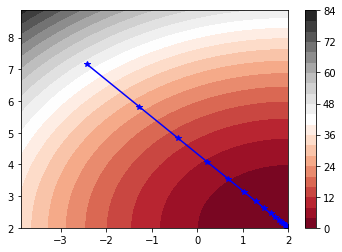

In [17]:
contours = plt.contourf(x, y, Z, 20, cmap='RdGy')
plt.plot(px, py, "b-*")
plt.colorbar();

### Question 2
$f(x, y) = (1-x)^2+100(y-x^2)^2$ 의 최소값을 경사하강법을 (또는 최대값을 경사상승법을) 사용하여 구하라. 해당 함수는 Rosenbrock function이다.¶

In [106]:
# def get_rosen_gradient(v):     
# #     x_grad = 400*v[0]**3 + 2*v[0] -2 -400*v[0]*v[1] 
# #     y_grad = -200*v[0]**2 + 200*v[1]
#     return 400*v[0]**3 + 2*v[0] -2 -400*v[0]*v[1] , -200*v[0]**2 + 200*v[1]


def get_rosen_gradient(v):
    """편미분 함수를 구한다. 즉 시점에서의 gradient"""
    return [400 * v[0] ** 3 - 400 * v[0] * v[1] + 2 * v[0] - 2, 200 * v[1] - 200 * v[0] ** 2]

In [52]:
def step(v, gradient, step_size):
    return [v_i - step_size * direction_i for v_i, direction_i in zip(v, gradient)]

In [53]:
import math
def distance(v, w):
    return math.sqrt(sum([(v_i - w_i)**2 for v_i, w_i in zip(v, w)]))

In [127]:
import numpy as np

#random_generator = np.random.RandomState(6)

# 첫번째 시작점 x_0, y_0를 선택한다.
v = [random_generator.randint(-10, 10) for _ in range(2)]
v

[3, 1]

In [128]:
alpha = 0.0001

In [123]:
v=[0,-1]

In [124]:
get_rosen_gradient(v)

[-2, -200]

In [129]:
cnt = 0  # 중간 결과값을 출력할 때 사용하기 위함
tol = 0.00001
gradients = []  # Gradient의 변화
plot_points = []  # Plotting을 위한 것

while True:
    cnt += 1
    gradient = get_rosen_gradient(v)  # 시점에서의 gradient
    next_v = step(v, gradient, alpha)
    if not cnt % 15:
        plot_points.append(next_v)
        print(next_v)  # Debugging 용
    if distance(next_v, v) < tol:
        break
    gradients.append(next_v)
    v = next_v

[1.2444685369704163, 1.3985863928023226]
[1.1971813538549574, 1.4176567023118611]
[1.1919675940413308, 1.4195949419618303]
[1.1912904814496437, 1.4196379083007538]
[1.1911360206759134, 1.4194619683773746]
[1.1910422547795094, 1.4192606793737845]
[1.190955567158153, 1.4190565162125894]
[1.1908697271986173, 1.418852090915321]
[1.1907840105756229, 1.4186477071431385]
[1.1906983330583198, 1.4184434001943842]
[1.190612684847604, 1.4182391741592508]
[1.1905270648019362, 1.4180350294976722]
[1.1904414727870662, 1.417830966247171]
[1.1903559087859699, 1.417626984396101]
[1.1902703727952642, 1.4174230839270852]
[1.190184864813152, 1.4172192648220763]
[1.1900993848380161, 1.4170155270629416]
[1.1900139328682553, 1.4168118706315347]
[1.1899285089022658, 1.4166082955097006]
[1.1898431129384404, 1.4164048016792805]
[1.1897577449751653, 1.4162013891221088]
[1.1896724050108247, 1.4159980578200133]
[1.1895870930437944, 1.4157948077548175]
[1.1895018090724478, 1.415591638908338]
[1.1894165530951528, 1.

In [130]:
# Numpy array로 변경하면 사용이 편하다.
gradients = np.array(gradients)

x = gradients[:, 0]
y = gradients[:, 1]

In [131]:
# 등고선을 그리기 위해서는 meshgrid가 필요함
X, Y = np.meshgrid(x, y)
Z = (X-2) ** 2 + (Y-2) ** 2

In [132]:
# 최소값의 변화를 확인하기 위하여 plot
plot_points = np.array(plot_points)

px = plot_points[:, 0]
py = plot_points[:, 1]

In [133]:
import matplotlib.pyplot as plt

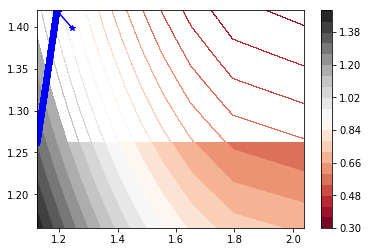

In [134]:
contours = plt.contourf(x, y, Z, 20, cmap='RdGy')
plt.plot(px, py, "b-*")
plt.colorbar();

In [141]:
v = [random_generator.randint(-10, 10) for _ in range(2)]
v

[0, -10]

In [142]:
cnt = 0  # 중간 결과값을 출력할 때 사용하기 위함
tol = 0.001
gradients = []  # Gradient의 변화
plot_points = []  # Plotting을 위한 것

while True:
    cnt += 1
    gradient = get_rosen_gradient(v)  # 시점에서의 gradient
    next_v = step(v, gradient, alpha)
    if not cnt % 15:
        plot_points.append(next_v)
        print(next_v)  # Debugging 용
    if distance(next_v, v) < tol:
        break
    gradients.append(next_v)
    v = next_v

[0.0006345238622441121, -7.385690959986501]
[0.0008430044066970357, -5.454843003472325]
[0.0011124532956700512, -4.02877825473961]
[0.0014581995783431404, -2.9755307125330086]
[0.0018964031017608795, -2.1976343191913505]
[0.0024441145098367677, -1.623103585597784]
[0.003118353009553472, -1.1987721511634581]
[0.003934982660209194, -0.8853728415737023]
[0.004907534372703278, -0.6539039441873026]
[0.006046145935122857, -0.4829454470515162]
[0.007356782077179517, -0.35667689635236943]
[0.00884084612781149, -0.26341345322559745]
[0.01049521996447175, -0.19452468219850186]
[0.012312692632562702, -0.1436360177487998]
[0.014282680419079591, -0.10603901042226171]
[0.01639211298158558, -0.07825577084101361]
[0.0186263612187904, -0.05771729703048474]


In [143]:
# Numpy array로 변경하면 사용이 편하다.
gradients = np.array(gradients)

x = gradients[:, 0]
y = gradients[:, 1]

In [144]:
# 등고선을 그리기 위해서는 meshgrid가 필요함
X, Y = np.meshgrid(x, y)
Z = (X-2) ** 2 + (Y-2) ** 2

In [145]:
# 최소값의 변화를 확인하기 위하여 plot
plot_points = np.array(plot_points)

px = plot_points[:, 0]
py = plot_points[:, 1]

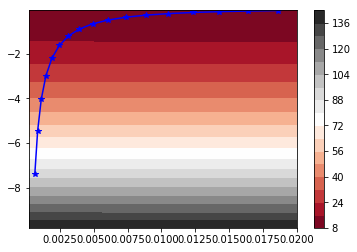

In [147]:
contours = plt.contourf(x, y, Z, 20, cmap='RdGy')
plt.plot(px, py, "b-*")
plt.colorbar();